In [37]:
# import the data file

import pandas as pd

df = pd.read_csv("data.csv", skipinitialspace=True)

In [38]:
df 

,Data Type,Array Length,Host Memory Type,Size (Bytes),Direction,GPU Model,Hostname,Wall Time (s),Bandwidth (GB/s)
0,real32,50,pageable,200,h2d,NVIDIA,fullcircle,0.000004,0.05362
1,real32,50,pageable,200,d2h,NVIDIA,fullcircle,0.000005,0.04115
2,real32,50,pinned,200,h2d,NVIDIA,fullcircle,0.000004,0.04831
3,real32,50,pinned,200,d2h,NVIDIA,fullcircle,0.000004,0.04751
4,real64,25,pageable,200,h2d,NVIDIA,fullcircle,0.000004,0.05435
...,...,...,...,...,...,...,...,...,...
403,real32,500000,pinned,2000000,d2h,NVIDIA,fullcircle,0.000158,12.70000
404,real64,250025,pageable,2000200,h2d,NVIDIA,fullcircle,0.000199,10.08000
405,real64,250025,pageable,2000200,d2h,NVIDIA,fullcircle,0.000250,8.00300
406,real64,250025,pinned,2000200,h2d,NVIDIA,fullcircle,0.000172,11.64000


In [45]:
# Importing Matplotlib
import matplotlib

# Change the backend renderer by uncommenting this line
#matplotlib.use("webagg")

# Now 
from matplotlib import pyplot as plt

In [46]:
%matplotlib widget

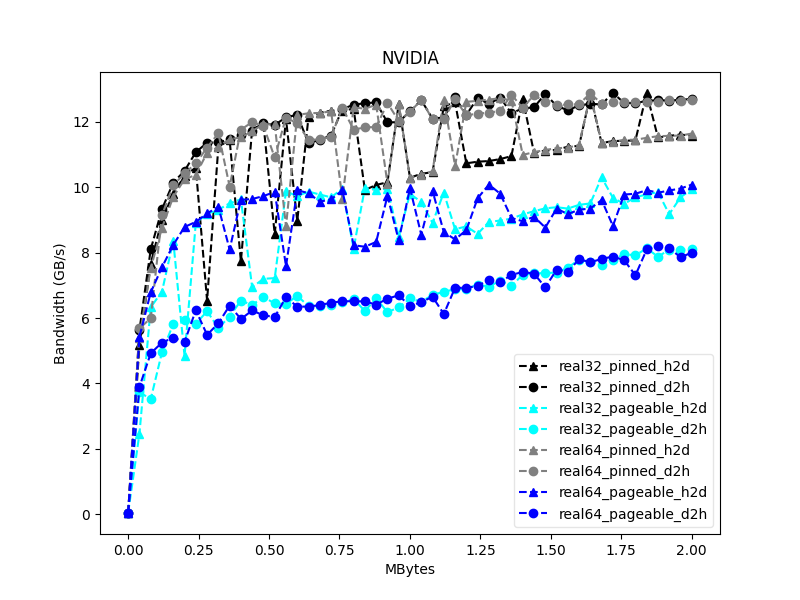

In [62]:
[fig, ax] = plt.subplots(figsize=(8, 6))

colours = {"pinned_real32" : "black",
           "pinned_real64" : "grey",
           "pageable_real32" : "cyan",
           "pageable_real64" : "blue"}

for dtype in ["real32", "real64"]:
    for memtype in ["pinned", "pageable"]:
        for direction, marker in zip(["h2d", "d2h"], ["^","o"]):
            col = colours[f"{memtype}_{dtype}"]
            selector = (df["Data Type"] == dtype) & (df['Host Memory Type'] == memtype) & (df["Direction"] == direction)
            ax.plot(df[selector]["Size (Bytes)"]/1e6, df[selector]["Bandwidth (GB/s)"], f'--{marker}', color=col, label=f"{dtype}_{memtype}_{direction}")

ax.set_title(df["GPU Model"][0])
ax.set_xlabel("MBytes")
ax.set_ylabel("Bandwidth (GB/s)")
ax.legend(loc=0, fancybox=True, framealpha=0.5)